In [1]:
from matplotlib import pyplot as plt
from random import random
plt.rcParams.update({'pdf.fonttype': 'truetype'})

In [2]:
def get_max_risk(dataset_name):
    d = {'gdp': 43.986571428571416,
        'wage': 2029057842.6515312,
        'titanic': 1.0,
        'insurance': 146542766.493548, #322646873.58870494,
        'used_cars': 194464336.77843493, #1.1539564110413285, #194464336.77843493, #81687578.7624796, #
        'tic_tac_toe': 1.0,
        'boston': 592.1469169960473,
        'world_happiness_indicator': 30.46778212179487,
        'Demographics': 31.64835409252669,
        'IBM_HR': 1.0, 'telco_churn': 1.0,
        'mobile_prices': 3.5,
        'GenderRecognition': 1.0,
        'breast_cancer': 1.0,
        'load_diabetes': 29074.481900452487,
        'iris': 1.0,
        'load_wine': 1.0,
         'suicide_rates_cleaned': 523.7783290690134,
         'videogamesales': 2.70680865164444,
         'digits5': 1.0,
         'red_wine_quality': 32.41651031894934, 
         'banknote': 1.0, 
         'liver': 1.0, 
         'magic': 0.8045650479470611, #1.0, 
         'adult': 0.7576827322780852,#1.0,
         'who_life_expectancy': 4882.764241803283,
         'vaccine': 228506505.50612897, 
         'ships': 12.342277392898044, 
         'smoking': 7.500299349437478, 
         'covid_vic': 51.62076805721374, 
         'covid_world': 14143.401514056353, 
         'covid': 1082.8170359400497, 
         'bicycle': 1076.416963882381, 
         'austin-water': 3975.767978495398,
         'make_friedman2': 379683.4049960418, 
         'make_friedman3': 1.8780821278399789, 
         'make_friedman1': 226.89125115757616
        }
    if dataset_name in d:
        return d[dataset_name]
    else:
        return 1

In [3]:
used_cars_boosting_rule=r"$\bf{SOTA: Stagewise Gradient Boosting}$"+'''
$+10488$ if True
$+15920$ if PS$\geq$160 & year$\geq$2011
$-7284$   if PS$\leq$220 & year$\leq$2005
$+6680$   if count$\leq$149 & PS$\geq$220 & year$\geq$2005
$-2733$   if PS$\leq$80
$+6675$   if PS$\geq$80 & year$\geq$2015
$+3105$   if count$\leq$18 & PS$\geq$160 & 2000$\leq$year$\leq$2011
$-5891$   if km$\geq$50k & PS$\geq$160 & year$\geq$2011
$+1686$   if km$\leq$125k & PS$\geq$120 & year$\geq$2008
$+1902$   if km$\geq$50k & PS$\leq$220 & 2000$\leq$year$\leq$2005
$-2270$   if PS$\leq$120 & PS$\leq$160 & 2005$\leq$year$\leq$2011
$ -834$     if count$\geq$69 & year$\leq$2008
$+3805$   if PS$\leq$80 & year$=$2005'''
used_cars_orth_rule=r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
$+9614$   if True
$+6129$   if count$\leq$149 & PS$\geq$160 & year$\geq$2008
$-1887$   if PS$\leq$160 & year$\leq$2008
$+10020$ if km$\leq$125k & PS$\geq$120 & year$\geq$2011
$+5940$   if count$\leq$32 & PS$\geq$220 & year$\geq$2005
$-3752$   if PS$\leq$220 & year$\leq$2005
$-5675$   if 50k$\leq$km$\leq$125k & 120$\leq$PS$\leq$220
$-2914$   if PS$\leq$120 & year$\leq$2011'''

bknt_tmp='$+5.05$ if -2.18$\leq$curt$\leq$-0.18 & ent$\geq$0.54 & skew$\leq$3.42 & 1.24$\leq$var$\leq$3.38'
banknote_boosting_rule=r"$\bf{SOTA: Stagewise Gradient Boosting}$"+'''
$- 3.03$ if var$\geq$1.24
$+3.47$ if skew$\leq$7.62 & var$\leq$-0.50
$+5.65$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.01$ if curt$\geq$-2.18 & skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 5.38$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.41$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & -0.50$\leq$var$\leq$1.24
$- 3.92$ if curt$\leq$-2.18 & skew$\geq$7.62 & var$\leq$1.24
$- 2.76$ if curt$\geq$-0.18 & ent$\leq$-0.19 & skew$\leq$0.76 & -0.507$\leq$var$\leq$1.24
$- 3.47$ if curt$\geq$1.40 & skew$\geq$7.62 & var$\leq$-2.26'''
banknote_orth_rule = r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
$- 4.80$ if var$\geq$1.24
$+5.20$ if skew$\leq$7.62 & var$\leq$-0.50
$+7.68$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.36$ if skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 6.81$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.34$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & 
            -0.50$\leq$var$\leq$1.24'''
magic_boosting_rule=r"$\bf{SOTA: Stagewise XGBoost}$"+'''
+1.401 if fAlp<=17.7
-1.341 if fAlp>=17.7 & fLen>=36.9
+0.630 if fDist<=191 & fLen<=36.9
+0.822 if fAsym>=3.9 & fConc<=0.355 & fM3Lon>=15.2 
             & fWidt>=17.1
-1.090 if fAsym<=3.9 & fLen>=36.9 & fM3Lon<=15.2
             & fSize>=2.73 & fWidt>=17.1
-0.862 if fAlp>=17.7 & fDist>=191 & fSize>=2.73
+0.349 if fConc<=0.196
-0.894 if fConc>=0.355 & fSize>=2.73'''
magic_orth_rule = r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
+1.767 if fAlp<=17.7
-1.951 if fAlp>=17.7 & fLen1t>=36.9
+0.754 if fAlp>=17.7 & fDist<=191
-1.039 if fConc>=0.196 & fConc>=0.355 & fSize>=2.73
+0.780 if fAsym>=3.9 & fConc<=0.196 & fConc<=0.355
-1.140 if fLen>=36.9 & fM3Lon<=15.2 & fSize>=2.73 
             & fWidt>=17.1'''
magic_boosting_rule=magic_boosting_rule.replace('\n+', '\n$+').replace('\n-', '\n$-').replace(' if', '$ if') \
            .replace('>=', '$\geq$').replace('<=','$\leq$').replace(' f',' ')
magic_orth_rule=magic_orth_rule.replace('\n+', '\n$+').replace('\n-', '\n$-').replace(' if', '$ if') \
            .replace('>=', '$\geq$').replace('<=','$\leq$').replace(' f',' ')
adult_boosting_rule=r"$\bf{SOTA: Stagewise XGBoost}$"+'''
-1.702 if marita=Y
-0.949 if edu<=10 & hrs<=40
+0.957 if age>=37 & edu>=10 & hrs>=40 & rel>=2 & sex=M
-0.727 if age<=37 & edu<=10
-0.574 if hrs<=40 & marital=Y
+2.335 if cap>=99999
+0.839 if edu>=10 & marital=N & rel<=2.0 & sex=F
+2.722 if edu>=16 & marital=Y & rel>=2.0
-0.727 if marital=Y & rel<=2'''
adult_orth_rule = r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
-2.005 if marital=Y
-1.153 if edu<=10
+0.560 if age>=37 & edu>=10 & hrs>=40 & rel>=2 & sex=M
+0.836 if age>=37 & hrs>=40
-0.432 if hrs<=40'''
adult_boosting_rule=adult_boosting_rule.replace('\n+', '\n$+').replace('\n-', '\n$-').replace(' if', '$ if') \
            .replace('>=', '$\geq$').replace('<=','$\leq$').replace(' f',' ')
adult_orth_rule=adult_orth_rule.replace('\n+', '\n$+').replace('\n-', '\n$-').replace(' if', '$ if') \
            .replace('>=', '$\geq$').replace('<=','$\leq$').replace(' f',' ')
insurance_boosting_rule=r"$\bf{SOTA: Stagewise Gradient Sum}$"+'''
+13286 if True
+19087 if smoker>=1
-5272 if age<=53
+2681 if age>=34.0 & bmi>=25.4
-2062 if smoker<=0
+10257 if bmi>=28.7 & smoker>=1
-1734 if age<=44
+1998 if children>=1 & smoker<=0
-2092 if bmi<=31.9
+1465 if age>=24.0 & bmi<=31.92 & smoker<=0'''
insurance_orth_rule = r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
+13286 if True
+12310 if bmi>=28.7 & smoker>=1
-2528 if age<=44 & smoker<=0
+4004 if age>=34 & smoker>=1
+7980 if bmi>=31.9 & smoker>=1
+8552 if smoker>=1
-2033 if age<=53 & children<=1'''
insurance_boosting_rule=insurance_boosting_rule.replace('\n', '\n$').replace(' if', '$ if') \
            .replace('smoker>=1', 'smoker=Y').replace('smoker<=0', 'smoker=N') \
            .replace('>=', '$\geq$').replace('<=','$\leq$') 
insurance_orth_rule=insurance_orth_rule.replace('\n', '\n$').replace(' if', '$ if') \
            .replace('smoker>=1', 'smoker=Y').replace('smoker<=0', 'smoker=N') \
            .replace('>=', '$\geq$').replace('<=','$\leq$')
friedman2_boosting_rule=r"$\bf{SOTA: Stagewise XGBoost}$"+'''
+668.7 if x2>=1082 & x3>=0.6114
-274.3 if x3<=0.3993
-208.0 if x2<=437.8
+130.1 if x2>=771.7 & x3>=0.2046
-258.1 if 1082<=x2<=1423 & x3>=0.6114
+168.3 if x2>=771.7 & x3>=0.8107
-137.1 if x2<=1082 & 0.3993<=x3<=0.6114
+162.7 if x2>=1423 & 0.2046<=x3<=0.6114
-118.5 if x2>=1082 & 0.6114<=x3<=0.8107
-91.60 if 437.8<=x2<=1423 & x3<=0.2046'''
friedman2_orth_rule = r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
+286.0 if x2>=1082 & x3>=0.6114
-351.2 if x3<=0.3993
+258.5 if x2>=771.7 & x3>=0.2046
-168.4 if x2<=1423 & 0.3993<=x3<=0.81075
-151.8 if x2<=437 & x3>=0.3993
+315.6 if x2>=1423 & x3>=0.8107
+96.13 if x2>=437.8 & x3>=0.6114'''
friedman2_boosting_rule=friedman2_boosting_rule.replace('\n', '\n$').replace(' if', '$ if') \
            .replace('>=', '$\geq$').replace('<=','$\leq$').replace('x2','$x_2$').replace('x3','$x_3$')
friedman2_orth_rule=friedman2_orth_rule.replace('\n', '\n$').replace(' if', '$ if') \
            .replace('>=', '$\geq$').replace('<=','$\leq$').replace('x2','$x_2$').replace('x3','$x_3$')
smoking_boosting_rule=r"$\bf{SOTA: Stagewise Gradient Sum}$"+'''
+1.1029 if age>=60
-0.3211 if age<=80 & smoke<=20
-0.2050 if age<=60
+0.2049 if age>=40 & smoke>=20
-0.3985 if age<=24
-0.1316 if age=60
+0.0699 if age>=80 & smoke<=20
-0.0636 if age<=80 & age>=60
+0.1058 if 40<=age<=60 & smoke>=20'''
smoking_orth_rule = r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
+0.4601 if age>=80
+0.7196 if age>=60
-0.3105 if age<=80 & smoke<=10
-0.8329 if age<=24
+0.1855 if age>=90 & smoke>=20'''
smoking_boosting_rule=smoking_boosting_rule.replace('\n', '\n$').replace(' if', '$ if') \
            .replace('>=', '$\geq$').replace('<=','$\leq$') 
smoking_orth_rule=smoking_orth_rule.replace('\n', '\n$').replace(' if', '$ if') \
            .replace('>=', '$\geq$').replace('<=','$\leq$')

In [4]:
import numpy as np
bank_sirus_comp=np.cumsum([2,2,2,2,2,3,3,2,3,3,3,2,3,3,3,3,2,2,3,2,3,3,3,2,2,2,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3])
bank_sirus_train=[1.0000000,0.8457616,0.8554199,0.8402569,0.8336402,0.8407069,0.8430264,0.8432240,0.8476775,
0.8447023,0.8471400,0.8453785,0.8471116,0.8486667,0.8482915,0.8497574,0.8504846,0.8517341,
0.8521353,0.8507546,0.8538248,0.8525157,0.8523542,0.8521450,0.8539293,0.8536963,0.8543751,
0.8546353,0.8538218,0.8539122,0.8499622,0.8527685,0.8516955,0.8519916,0.8528138,0.8508883,
0.8490368,0.8496360,0.8499764,0.8486021,0.8484732,0.8504235,0.8491191,0.8492093,0.8495956,
0.8495205,0.8515217,0.8494077,0.8498719,0.8502503,0.8504190]
bank_sirus_test=[1.0000000,0.8457770,0.8563435,0.8415495,0.8356448,0.8431540,0.8453514,0.8455284,0.8498098,
0.8476470,0.8492228,0.8470909,0.8493657,0.8514621,0.8505370,0.8521289,0.8526348,0.8541204,
0.8544173,0.8530394,0.8561517,0.8549817,0.8547452,0.8544461,0.8563708,0.8561704,0.8568506,
0.8570256,0.8565116,0.8566705,0.8524966,0.8554407,0.8542797,0.8545019,0.8555264,0.8532700,
0.8516675,0.8523697,0.8526801,0.8511794,0.8510926,0.8534752,0.8519732,0.8521046,0.8525117,
0.8524180,0.8544382,0.8524735,0.8527148,0.8530158,0.8531612,0.8525395]
used_cars_sirus_comp=[0, 2, 4, 7, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 
                 81, 84, 87, 90, 93, 96, 99, 102]
used_cars_sirus_train=[1, 0.9994350, 0.8696765, 0.8626640, 0.8440756, 0.7515519, 0.7558351, 0.7556530,
    0.6891838, 0.6827963, 0.6757399, 0.6757356, 0.6668457, 0.6668479, 0.6668457,
    0.6593183, 0.6593379, 0.6606534, 0.6604860, 0.6425454, 0.6379903, 0.6380648,
    0.6367842, 0.6369410, 0.5981340, 0.5784931, 0.5784822, 0.5785450, 0.5785502,
    0.5785502, 0.5576540, 0.5566320, 0.5762792, 0.5567980, 0.5544311, 0.5544229,
    0.5543182, 0.5433708, 0.5509874, 0.5511007, 0.5432737, 0.5434794, 0.5434788,
    0.5442668, 0.5428193, 0.5522481, 0.5421468, 0.5354273, 0.5421665, 0.5334900,
    0.5343200, 0.5377863]
used_cars_sirus_test=[0.9971751, 0.8632818, 0.8556711, 0.8556092, 0.8299741, 0.8306051, 0.8293350, 0.8315003, 0.8315006,
    0.8315006, 0.8315005, 0.8314101, 0.8334764, 0.8334761, 0.8353698, 0.8380277, 0.8380255, 0.8383163,
    0.8381883, 0.8347613, 0.8482547, 0.8550078, 0.8392419, 0.8588412, 0.8608018, 0.8608198, 0.8499406,
    0.8970128, 0.9015498, 0.9014993, 0.9014991, 0.9317368, 0.9038972, 0.9039428, 0.9482345, 0.9371175,
    0.9434899, 0.9334921, 0.9342142, 0.9384535, 0.9520204, 0.9520513, 0.9515842, 0.9522726, 0.9522737,
    1.0169144, 0.9517031, 0.9632834, 0.9413457, 0.9452707, 0.9182855, 1.0162028]
magic_sirus_train=[1, 0.907714702, 0.904730165, 0.901735377, 0.901734902, 0.899975851, 0.899888751, 0.899952813, 0.898973184, 0.8999511, 0.899826726, 0.899554735, 0.898038034, 0.896876481, 0.8947733, 0.895219541, 0.895222007, 0.894777937, 0.88208413, 0.877286373, 0.881271792, 0.881051159, 0.879418736, 0.879524151, 0.880821352, 0.875800791, 0.877693777, 0.875367122]
magic_sirus_test=[1, 0.903979148, 0.90125385, 0.89891515, 0.898912246, 0.896701693, 0.896493301, 0.896745921, 0.896043359, 0.896858731, 0.896401686, 0.896275059, 0.894637743, 0.893787301, 0.891035623, 0.891286968, 0.891268352, 0.891045853, 0.881194313, 0.876392849, 0.878279771, 0.878369711, 0.878167932, 0.877642907, 0.879555851, 0.875144534, 0.876613331, 0.874611697]
magic_sirus_comp=[ 0, 3, 6, 9, 13, 16, 19, 23, 26, 30, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101]
adult_sirus_train=[1, 0.827950671, 0.825268614, 0.790406346, 0.788942913, 0.788407427, 0.788407343, 0.788407343, 0.787261969, 0.785744894, 0.784480397, 0.784022504, 0.78426393, 0.781394174, 0.782357228, 0.785018843, 0.782804776, 0.780742672, 0.779974202, 0.779845497, 0.779686531, 0.780048557, 0.778736513, 0.778706367, 0.778780765, 0.778740526, 0.778874087, 0.778691648, 0.779276715]
adult_sirus_test=[1, 0.825838025, 0.822531286, 0.788277949, 0.786596977, 0.786138311, 0.78613834, 0.78613834, 0.78538085, 0.783697965, 0.782963363, 0.782669547, 0.782763684, 0.780181678, 0.78051681, 0.78291308, 0.7814055, 0.778986686, 0.778602203, 0.778425545, 0.778217671, 0.778557193, 0.777560461, 0.777614419, 0.777430553, 0.777422411, 0.77775185, 0.777234503, 0.777992021]
adult_sirus_comp=[0, 3, 6, 10, 14, 17, 21, 25, 29, 32, 35, 38, 42, 46, 49, 53, 57, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104]
insurance_sirus_comp=[0,3, 7, 11, 15, 19, 22, 25, 28, 31, 34, 37, 41, 44, 48, 52, 56, 60, 64, 68, 72, 75, 79, 83, 87, 91, 95, 98, 101]
insurance_sirus_train=sorted([1, 0.375274097, 0.375274097, 0.174691768, 0.174706093, 0.331560718, 0.272463336, 0.256619084, 0.254796485, 0.252947348, 0.252271602, 0.250768282, 0.252880125, 0.247506539, 0.15061031, 0.248687023, 0.150788998, 0.248093604, 0.243347628, 0.24504864, 0.244172272, 0.146573068, 0.238755419, 0.144197408, 0.143505937, 0.145878192, 0.232858347, 0.140317773, 0.144418097], reverse=True)
insurance_sirus_test=sorted([1, 0.400141896, 0.400141612, 0.242401636, 0.241901925, 0.375543133, 0.30107572, 0.281778677, 0.284481207, 0.276363891, 0.283078812, 0.28357036, 0.275329516, 0.281729078, 0.206568447, 0.278730209, 0.206857707, 0.277790468, 0.281636512, 0.294414743, 0.271453779, 0.20259261, 0.277637762, 0.206132798, 0.201562504, 0.202708038, 0.26059655, 0.200711737, 0.201805056], reverse=True)
friedman2_sirus_train=[1, 0.631651482, 0.628285777, 0.627648048, 0.354992759, 0.354973403, 0.279720987, 0.254866753, 0.254871806, 0.254795943, 0.254880571, 0.213723543, 0.254755628, 0.236670383, 0.230291317, 0.236818049, 0.184280558, 0.180646548, 0.183524699, 0.176341743, 0.19018108, 0.176359256, 0.176164815, 0.183549872, 0.163040675, 0.184235278, 0.163640745, 0.175671777, 0.159103784, 0.159098733]
friedman2_sirus_test=[1, 0.580185062, 0.578485389, 0.578198853, 0.315533095, 0.31565032, 0.24836172, 0.235189396, 0.235146227, 0.234877074, 0.235106209, 0.191396858, 0.234997641, 0.216761341, 0.212502177, 0.216730125, 0.167575592, 0.16467461, 0.170681142, 0.163764996, 0.171331952, 0.163921715, 0.163540244, 0.170269515, 0.150443699, 0.167181605, 0.146021392, 0.163211159, 0.14484681, 0.144859482]
friedman2_sirus_comp=[0, 3, 6, 9, 12, 16, 20, 24, 28, 31, 35, 38, 41, 44, 47, 50, 53, 57, 60, 64, 68, 71, 75, 78, 82, 86, 90, 94, 98, 102]
smoking_sirus_train=[]
smoking_sirus_test=[]
smoking_sirus_comp=[]

In [5]:
from matplotlib import pyplot as plt
from random import random

def compare_both(dataset_names, location='../experiment_output_20240113defaultvarreg_exhaustive_fixed_bg', max_risk=1, 
                 repeat=1, col=[10], 
            max_length=100, title=None, reps=[0,0], pdfname=None, sirus_comps=[], sirus_trains=[], sirus_tests=[],
                     boosting_rules=[], fcogb_rules=[], text_locations=[], arrow_ends=[], arrow_starts=[],
                legend_locations=[],ylim=[[0.01, 1.1]], title_loc=[[40, 0.95]]):
    fig, axs = plt.subplots(3, 2, sharey=False,sharex=True, tight_layout=True, squeeze=False, figsize=(9.5,12), 
                            gridspec_kw={'width_ratios': [1, 1.05]})
    for p in range(6):
        ax=axs[p//2, p%2]
        dataset_name=dataset_names[p]
        test_risks={}
        train_risks={}
        and_counts={}
        aucs={}
        file_numbers={}
        desc=dataset_name
        print(desc)
        max_risk=get_max_risk(dataset_name)
        
        objs = ['mwg','gpe', 'xgb','orth']#['mwg','gpe','orth'] if p==0 else ['mwg','gpe','xgb','orth']
        for obj in objs:
            algos = ['fc'] if obj=='orth' else ['boosting'] if obj=='gpe' or obj=='mwg' else ['keep']
            search=''#'exhaustive' if obj not in['mwg', 'gpe'] else 'greedy'
#             print(search)
            max_risk = get_max_risk(dataset_name) 
#             print('max risk',obj, max_risk)
            for algo in algos:
                methods = ['Newton-CG'] if algo=='fc' else ['']
                for method in methods:
                    done = True
                    fc_train=[0]*(50 if p==0 else 50)
                    fc_test=[0]*(50 if p==0 else 50)
                    ands = [0]*(50 if p==0 else 50)
                    file_number=0
                    for i in range(repeat):
                        filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                            str(col[p]) + '_rep' + str(reps[p] if obj!='mwg' else reps[p]) + '.txt'
                        try:
                            f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                            file_number+=1
                        except:
                            print(obj, algo, method,'does not exist: ')
                            print(location+search+'/'+dataset_name+'/'+filename)
                            continue
                        j=-1
#                         print('j=',j)
                        for line in f:
                            if 'iteration ' in line:
                                j+=1
                            if j>=50:
                                break
                            words=line.split(' ')
                            if 'fc train risk' in line:
                                fc_train[j] += float(words[-1])
                            elif 'fc test risk' in line:
                                fc_test[j] += float(words[-1])
                            if 'if' in line:
                                ands[j]+=line.count('=')+1
                    if done:
                        file_numbers[obj + '_' + algo + '_' + method] = file_number
                        train_risks[obj + '_' + algo + '_' + method]=fc_train
                        test_risks[obj + '_' + algo + '_' + method]=fc_test
                        and_counts[obj + '_' + algo + '_' + method]=ands
                        if file_number==0:
                            continue
                        print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                              'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

        rg=list(range(1,51))
        
        colours = {}
        line_width = {}
        ax.step(sirus_comps[p],sirus_trains[p][:len(sirus_comps[p])], ':', color='purple', linewidth=1.1, where='post')
        ax.step(sirus_comps[p],sirus_tests[p][:len(sirus_comps[p])], color='purple', 
                 linewidth=1.1, label='SIRUS', where='post')
        width = [1.2,1.2, 1.5, 1]*4
        i = 0
        colours={'mwg_boosting_':'deepskyblue','gpe_boosting_':'green',
                'orth_fc_Newton-CG':'red','xgb_keep_':'violet',
                }
        label_map={'gpe_boosting_':'SGB' if p==0 else 'SGB', 
                   'orth_fc_Newton-CG': 'COB', 'xgb_keep_': 'SXB', 
                  'mwg_boosting_':'SGS'}
        for item in train_risks:
            i+=1
            max_risk = get_max_risk(dataset_name) #if 'orth'  in item else 1.1539564110413285
            if file_numbers[item]==0:
                continue
            train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
            test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
#             print(item, train_risks[item])
#             print(item, test_risks[item])
#             print(item, and_counts[item])
            
            and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
            aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                                 (min(max_length, and_counts[item][m+1])-
                                                                       min(max_length, and_counts[item][m]))
                                    for m in range(len(train_risks[item])-1))
#             print(item, 'auc:', aucs[item])
            last_index = and_counts[item].index(0) if 0 in and_counts[item] else -1
            ax.step([0]+sorted(and_counts[item][:last_index]), [1]+sorted(train_risks[item][:last_index], reverse=True), ':', color=colours[item],
                     linewidth=(1.2 if item!='orth_fc_Newton-CG' else 1.5),alpha=0.8,where='post')
            ax.step([0]+sorted(and_counts[item][:last_index]), [1]+sorted(test_risks[item][:last_index], reverse=True), color=colours[item],
                     label=label_map[item],linewidth=(1.2 if item!='orth_fc_Newton-CG' else 1.5),alpha=0.8,where='post')
        
        if p>=4:
            ax.set_xlabel('Complexity', fontsize=8)
        ax.set_xlim(0,max_length)
        if p%2==0:
            ax.set_ylabel('Risk', fontsize=8)
        ax.set_yscale('log')
        ax.plot([],[], ':', color='k', label='train')
        ax.plot([],[], color='k', label='test')
        boosting_rule=boosting_rules[p]
        orth_rule = fcogb_rules[p]
        try:
            ax.annotate('', xy=(arrow_ends[p][0][0], arrow_ends[p][0][1]), 
                        xytext=(arrow_starts[p][0][0], arrow_starts[p][0][1]), fontsize=4, 
                         arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",
                                         connectionstyle="arc3", facecolor='black'))
            ax.annotate('', xy=(arrow_ends[p][1][0], arrow_ends[p][1][1]), 
                        xytext=(arrow_starts[p][1][0], arrow_starts[p][1][1]), fontsize=4,
                         arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",
                                         connectionstyle="arc3", facecolor='black'))
        except:
            print('Error!', p, len(arrow_ends))
        if max_length==50:
            ax.set_ylim([0.01, 1.05])
            ax.legend(bbox_to_anchor=(0.98,0.58))
        if max_length==100:
            ax.set_ylim(ylim[p])
            if p==0:
                ax.legend(handlelength=1, ncol=1,bbox_to_anchor=(legend_locations[p][0],legend_locations[p][1]), prop = { "size": 6 })
        bbox_props = dict(boxstyle="round", fc="w", ec="k", alpha=0.5)
        ax.text(text_locations[p][0][0],text_locations[p][0][1], boosting_rule, bbox=bbox_props, fontsize=7)
        ax.text(text_locations[p][1][0],text_locations[p][1][1], orth_rule, bbox=bbox_props, fontsize=7)
#         ax.set_title(dataset_name.replace('_', ' '), fontsize=10)
        ax.text(title_loc[p][0],title_loc[p][1],dataset_name.replace('make_', ' '), fontsize=9)
#         ax.grid(visible=True, which='major')
#         ax.grid(visible=True, which='minor')
        ax.xaxis.set_tick_params(labelsize=8)
        ax.yaxis.set_tick_params(labelsize=8)
#         ax.tight_layout(pad=0.01)
    #     plt.gca().set_ylim(bottom=0)

    #     plt.legend()
    if pdfname is not None:
        print(pdfname)
        print(fig.dpi)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)
    plt.show()
    
#     return train_risks, test_risks, and_counts, aucs



magic
mwg_boosting_: avg train risk: 2.7288183474105314 avg test risk 2.647978916673884 &s: 159.3
gpe_boosting_: avg train risk: 1.8682570324607353 avg test risk 1.8232222031889946 &s: 106.1
xgb_keep_: avg train risk: 1.7862967674750074 avg test risk 1.7400399966919493 &s: 97.9
orth_fc_Newton-CG: avg train risk: 1.9505673225892615 avg test risk 1.8993452828886388 &s: 102.7
banknote
mwg_boosting_: avg train risk: 0.5197250669357973 avg test risk 0.530699225269644 &s: 144.0
gpe_boosting_: avg train risk: 0.3483234490993204 avg test risk 0.3429416838081761 &s: 112.0
xgb_keep_: avg train risk: 0.4503321904286688 avg test risk 0.46840878462626145 &s: 151.3
orth_fc_Newton-CG: avg train risk: 0.26542949528566406 avg test risk 0.2713012191680329 &s: 94.5
adult
mwg_boosting_: avg train risk: 2.6347520498075476 avg test risk 2.6844286133034045 &s: 173.5
gpe_boosting_: avg train risk: 1.866163517104103 avg test risk 1.9286585484909717 &s: 124.2
xgb_keep_: avg train risk: 1.9243222973965748 avg te

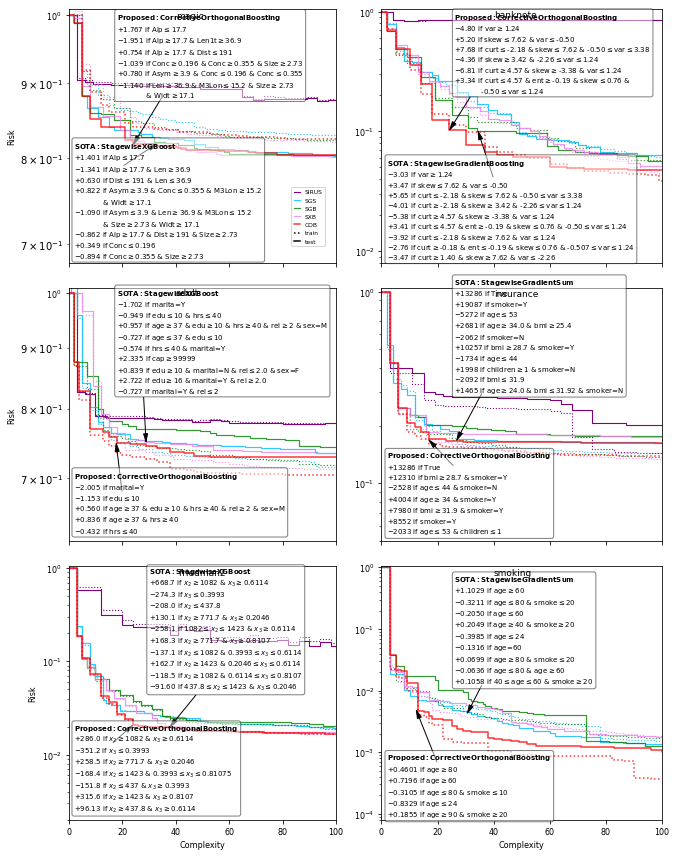

In [6]:
compare_both(['magic','banknote','adult', 'insurance','make_friedman2','smoking'], max_risk=1, repeat=1, 
             col=[5,10,5,10,10,10], 
                  max_length=100, title=None, reps=[0,0,0,0,0,0], pdfname='figure_combined.pdf', 
                 sirus_comps=[magic_sirus_comp,bank_sirus_comp,adult_sirus_comp,insurance_sirus_comp,
                              friedman2_sirus_comp,smoking_sirus_comp], 
                  sirus_trains=[magic_sirus_train,bank_sirus_train,adult_sirus_train,insurance_sirus_train,
                                friedman2_sirus_train,smoking_sirus_train], 
                  sirus_tests=[magic_sirus_test, bank_sirus_test, adult_sirus_test, insurance_sirus_test,
                               friedman2_sirus_test, smoking_sirus_test],
                  boosting_rules=[magic_boosting_rule, banknote_boosting_rule, adult_boosting_rule
                                 , insurance_boosting_rule, friedman2_boosting_rule, smoking_boosting_rule], 
                  fcogb_rules=[magic_orth_rule, banknote_orth_rule, adult_orth_rule
                              , insurance_orth_rule, friedman2_orth_rule, smoking_orth_rule],
            text_locations=[[[2,0.685],[18,0.88]],[[2,0.0085],[26,0.21]],
                           [[18,0.825],[2,0.63]],[[26,0.3], [2,0.055]],
                           [[30,0.05],[2,0.0025]],[[26,0.013], [2,0.00009]]], 
             arrow_ends=[[[34, 0.821], [23.5, 0.814]],[[23.6, 0.097],[34, 0.107]], 
                        [[29, 0.745], [17.6, 0.754]],[[26.2, 0.162], [16, 0.174]],
                        [[37, 0.0185], [25, 0.022]],[[30, 0.0038], [11.9, 0.0055]]], 
             arrow_starts=[[[20, 0.79], [35, 0.881]],[[32, 0.2],[40, 0.04]], 
                           [[28, 0.821],[20, 0.68]],[[36, 0.3],[26, 0.122]],
                           [[48, 0.045],[16, 0.013]],[[36, 0.013],[20, 0.00065]]],
            legend_locations=[[0.97,0.31]],
            ylim=[[0.68, 1.01],[0.008, 1.05], [0.62, 1.01], [0.05, 1.05],[0.002, 1.05],[0.00008, 1.05]],
            title_loc=[[40,.995], [40, 0.9],[40,.995], [40,0.95],[40,.84], [40,0.75]])

In [7]:
1/0

ZeroDivisionError: division by zero

# banknote

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
bank_comp=np.cumsum([2,2,2,2,2,3,3,2,3,3,3,2,3,3,3,3,2,2,3,2,3,3,3,2,2,2,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3])
bank_train=[1.0000000,0.8457616,0.8554199,0.8402569,0.8336402,0.8407069,0.8430264,0.8432240,0.8476775,
0.8447023,0.8471400,0.8453785,0.8471116,0.8486667,0.8482915,0.8497574,0.8504846,0.8517341,
0.8521353,0.8507546,0.8538248,0.8525157,0.8523542,0.8521450,0.8539293,0.8536963,0.8543751,
0.8546353,0.8538218,0.8539122,0.8499622,0.8527685,0.8516955,0.8519916,0.8528138,0.8508883,
0.8490368,0.8496360,0.8499764,0.8486021,0.8484732,0.8504235,0.8491191,0.8492093,0.8495956,
0.8495205,0.8515217,0.8494077,0.8498719,0.8502503,0.8504190]
bank_test=[1.0000000,0.8457770,0.8563435,0.8415495,0.8356448,0.8431540,0.8453514,0.8455284,0.8498098,
0.8476470,0.8492228,0.8470909,0.8493657,0.8514621,0.8505370,0.8521289,0.8526348,0.8541204,
0.8544173,0.8530394,0.8561517,0.8549817,0.8547452,0.8544461,0.8563708,0.8561704,0.8568506,
0.8570256,0.8565116,0.8566705,0.8524966,0.8554407,0.8542797,0.8545019,0.8555264,0.8532700,
0.8516675,0.8523697,0.8526801,0.8511794,0.8510926,0.8534752,0.8519732,0.8521046,0.8525117,
0.8524180,0.8544382,0.8524735,0.8527148,0.8530158,0.8531612,0.8525395]

In [ ]:
def compare_used_cars(dataset_name, location='../experiment_output20231221varreg_new', max_risk=1, repeat=1, col=10, 
            max_length=30, title=None, rep=1, pdfname=None, sirus_comp=[], sirus_train=[], sirus_test=[]):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['mwg','gpe', 'xgb', 'orth']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj in ['gpe'] or obj=='mwg' else ['keep']
        search=''#'exhaustive' if obj not in ['mwg', 'gpe'] else 'greedy'
        print(search)
        for algo in algos:
            methods = ['Newton-CG'] if algo=='fc' else ['']
            for method in methods:
                done = True
                fc_train=[0]*30
                fc_test=[0]*30
                ands = [0]*30
                file_number=0
                for i in range(repeat):
                    filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                        str(col) + '_rep' + str(rep) + '.txt'
                    try:
                        f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                        file_number+=1
                    except:
                        print(obj, algo, method,'does not exist: ')
                        print(location+search+'/'+dataset_name+'/'+filename)
                        continue
                    j=-1
                    for line in f:
                        if 'iteration ' in line:
                            j+=1
                        if j>=50:
                            break
                        words=line.split(' ')
                        if 'fc train risk' in line:
                            fc_train[j] += float(words[-1])
                        elif 'fc test risk' in line:
                            fc_test[j] += float(words[-1])
                        if 'if' in line:
                            ands[j]+=line.count('=')+1
                if done:
                    file_numbers[obj + '_' + algo + '_' + method] = file_number
                    train_risks[obj + '_' + algo + '_' + method]=fc_train
                    test_risks[obj + '_' + algo + '_' + method]=fc_test
                    and_counts[obj + '_' + algo + '_' + method]=ands
                    if file_number==0:
                        continue
                    print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                          'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,51))
    fig = plt.figure(figsize=(4,4.4))
#     plt.figure(figsize=(7.5,6.5))
    colours = {}
    line_width = {}
    
    plt.step(sirus_comp, sirus_train[:len(sirus_comp)], ':', color='purple', 
             linewidth=1.2, where='post')
    plt.step(sirus_comp, sirus_test[:len(sirus_comp)], color='purple', 
             linewidth=1.2, label='SIRUS', where='post')
    width = [1.2,1.2,1.2, 1.5, 1.1]*4
    i = 0
    colours={'mwg_boosting_':'deepskyblue','gpe_boosting_':'green',
                'orth_fc_Newton-CG':'red','xgb_keep_':'violet',
                }
    label_map={'gpe_boosting_':'GB', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG': 'CORB', 'xgb_keep_': 'XGB', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
              'mwg_boosting_':'GS'}
    for item in train_risks:
#         color = colors[i]
#         colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
#         print(and_counts[item], train_risks[item])
#         if item=='mwg_boosting_':
#             and_counts['mwg_boosting_']=[and_counts['mwg_boosting_'][i]+and_counts['orth_fc_Newton-CG'][0]
#                                          -and_counts['mwg_boosting_'][0] for i in range(len(and_counts['mwg_boosting_']))]
        last_index = and_counts[item].index(0) if 0 in and_counts[item] else -1
        plt.step([0]+and_counts[item][:last_index], [1]+train_risks[item][:last_index], ':', color=colours[item],
                 linewidth=line_width[item],where='post')
        plt.step([0]+and_counts[item][:last_index], [1]+test_risks[item][:last_index], color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.xlabel('Cognitive Complexity', fontsize=8)
    plt.ylabel('Risk', fontsize=8)
    plt.xlim(0,max_length)
#     plt.ylabel('Risk', fontsize=12)
    plt.yscale('log')
    boosting_rule=r"$\bf{SOTA: Gradient Boosting}$"+'''
$- 3.03$ if var$\geq$1.24
$+3.47$ if skew$\leq$7.62 & var$\leq$-0.50
$+5.65$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.01$ if curt$\geq$-2.18 & skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 5.38$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.41$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & -0.50$\leq$var$\leq$1.24
$- 3.92$ if curt$\leq$-2.18 & skew$\geq$7.62 & var$\leq$1.24
$- 2.76$ if curt$\geq$-0.18 & ent$\leq$-0.19 & skew$\leq$0.76 & -0.507$\leq$var$\leq$1.24
$+5.05$ if -2.18$\leq$curt$\leq$-0.18 & ent$\geq$0.54 & skew$\leq$3.42 & 1.24$\leq$var$\leq$3.38
$- 3.47$ if curt$\geq$1.40 & skew$\geq$7.62 & var$\leq$-2.26'''
    orth_rule = r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
$- 4.80$ if var$\geq$1.24
$+5.20$ if skew$\leq$7.62 & var$\leq$-0.50
$+7.68$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.36$ if skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 6.81$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.34$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & 
            -0.50$\leq$var$\leq$1.24'''
    plt.plot([],[], ':', color='k', label='train')
    plt.plot([],[], color='k', label='test')
    plt.annotate('', xy=(24, 0.102), xytext=(32, 0.32), fontsize=4, 
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    plt.annotate('', xy=(48.5, 0.115), xytext=(40, 0.04), fontsize=4,
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    if max_length==50:
        plt.ylim([0.03, 1.05])
        plt.legend(bbox_to_anchor=(0.98,0.58))
    if max_length==100:
        plt.ylim([0.008, 1.05])
        plt.legend(handlelength=1,bbox_to_anchor=(0.15,0.73),prop = { "size": 5 })
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
    plt.text(2,0.0085, boosting_rule, bbox=bbox_props, fontsize=6)
    plt.text(25,0.25, orth_rule, bbox=bbox_props, fontsize=6)
    
#     bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#     plt.text(7.8,0.25, boosting_rule, bbox=bbox_props, fontsize=11)
#     plt.text(1,0.031, orth_rule, bbox=bbox_props, fontsize=11)
#     plt.title(dataset_name.replace('_', ' '))
    plt.text(40, 0.9,fr"$\bf{dataset_name.replace('_', ' ')}$", fontsize=9)
#     plt.grid(visible=True, which='major')
#     plt.grid(visible=True, which='minor')
#     plt.gca().set_ylim(bottom=0)
    
    if pdfname is not None:
        
        print(pdfname)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight')
    plt.show()

In [ ]:
compare_used_cars('banknote', col=10, max_length=100, pdfname='banknote_compare100_1.pdf', rep=0, 
                  sirus_comp=bank_comp, sirus_train=bank_train, sirus_test=bank_test)

In [ ]:
compare_both(['make_friedman2'], location='../experiment_output_20240113defaultvarreg_exhaustive',
             max_risk=1, repeat=1, col=10, 
             max_length=100, title=None, reps=[0], pdfname='make_friedman2_no_bg_v2_5.pdf', 
             sirus_comps=[sirus_comp], 
             sirus_trains=[sirus_train], 
             sirus_tests=[sirus_test],
             boosting_rules=[boosting_rule], 
             fcogb_rules=[orth_rule],
             text_locations=[[[20,0.05],[2,0.0025], ]], 
             arrow_ends=[[[37, 0.0185], [25, 0.022],]], 
             arrow_starts=[[[28, 0.045],[16, 0.016], ]],
             legend_locations=[[0.9,0.255]],
             ylim=[0.002, 1.05], title_loc=[40,.84])

In [ ]:
def compare_used_cars(dataset_name, location='../experiment_output20231221varreg_new', max_risk=1, repeat=1, col=10, 
            max_length=30, title=None, rep=1, pdfname=None, sirus_comp=[], sirus_train=[], sirus_test=[]):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['gpe']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj in ['gpe'] or obj=='mwg' else ['keep']
        search=''#'exhaustive' if obj not in ['mwg', 'gpe'] else 'greedy'
        print(search)
        for algo in algos:
            methods = ['Newton-CG'] if algo=='fc' else ['']
            for method in methods:
                done = True
                fc_train=[0]*30
                fc_test=[0]*30
                ands = [0]*30
                file_number=0
                for i in range(repeat):
                    filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                        str(col) + '_rep' + str(rep) + '.txt'
                    try:
                        f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                        file_number+=1
                    except:
                        print(obj, algo, method,'does not exist: ')
                        print(location+search+'/'+dataset_name+'/'+filename)
                        continue
                    j=-1
                    for line in f:
                        if 'iteration ' in line:
                            j+=1
                        if j>=50:
                            break
                        words=line.split(' ')
                        if 'fc train risk' in line:
                            fc_train[j] += float(words[-1])
                        elif 'fc test risk' in line:
                            fc_test[j] += float(words[-1])
                        if 'if' in line:
                            ands[j]+=line.count('=')+1
                if done:
                    file_numbers[obj + '_' + algo + '_' + method] = file_number
                    train_risks[obj + '_' + algo + '_' + method]=fc_train
                    test_risks[obj + '_' + algo + '_' + method]=fc_test
                    and_counts[obj + '_' + algo + '_' + method]=ands
                    if file_number==0:
                        continue
                    print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                          'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,51))
    fig = plt.figure(figsize=(4,3.5))
#     plt.figure(figsize=(7.5,6.5))
    colours = {}
    line_width = {}
    
#     plt.step(sirus_comp, sirus_train[:len(sirus_comp)], ':', color='purple', 
#              linewidth=1.2, where='post')
#     plt.step(sirus_comp, sirus_test[:len(sirus_comp)], color='purple', 
#              linewidth=1.2, label='SIRUS', where='post')
    width = [1.2,1.2,1.2, 1.5, 1.1]*4
    i = 0
    colours={'mwg_boosting_':'deepskyblue','gpe_boosting_':'green',
                'orth_fc_Newton-CG':'red','xgb_keep_':'violet',
                }
    label_map={'gpe_boosting_':'GB', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG': 'CORB', 'xgb_keep_': 'XGB', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
              'mwg_boosting_':'GS'}
    for item in train_risks:
#         color = colors[i]
#         colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
#         print(and_counts[item], train_risks[item])
#         if item=='mwg_boosting_':
#             and_counts['mwg_boosting_']=[and_counts['mwg_boosting_'][i]+and_counts['orth_fc_Newton-CG'][0]
#                                          -and_counts['mwg_boosting_'][0] for i in range(len(and_counts['mwg_boosting_']))]
        last_index = and_counts[item].index(0) if 0 in and_counts[item] else -1
        plt.step([0]+and_counts[item][:last_index], [1]+train_risks[item][:last_index], ':', color=colours[item],
                 linewidth=line_width[item],where='post')
        plt.step([0]+and_counts[item][:last_index], [1]+test_risks[item][:last_index], color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.xlabel('Cognitive Complexity', fontsize=12)
    plt.xlim(0,max_length)
#     plt.ylabel('Risk', fontsize=12)
    plt.yscale('log')
    boosting_rule=r"$\bf{SOTA: Gradient Boosting}$"+'''
$- 3.03$ if var$\geq$1.24
$+3.47$ if skew$\leq$7.62 & var$\leq$-0.50
$+5.65$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.01$ if curt$\geq$-2.18 & skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 5.38$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.41$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & -0.50$\leq$var$\leq$1.24
$- 3.92$ if curt$\leq$-2.18 & skew$\geq$7.62 & var$\leq$1.24
$- 2.76$ if curt$\geq$-0.18 & ent$\leq$-0.19 & skew$\leq$0.76 & -0.507$\leq$var$\leq$1.24
$+5.05$ if -2.18$\leq$curt$\leq$-0.18 & ent$\geq$0.54 & skew$\leq$3.42 & 1.24$\leq$var$\leq$3.38
$- 3.47$ if curt$\geq$1.40 & skew$\geq$7.62 & var$\leq$-2.26'''
    orth_rule = r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
$- 4.80$ if var$\geq$1.24
$+5.20$ if skew$\leq$7.62 & var$\leq$-0.50
$+7.68$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.36$ if skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 6.81$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.34$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & 
            -0.50$\leq$var$\leq$1.24'''
    plt.plot([],[], ':', color='k', label='train')
    plt.plot([],[], color='k', label='test')
#     plt.annotate('', xy=(24, 0.102), xytext=(32, 0.32), fontsize=4, 
#                  arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    plt.annotate('', xy=(48.5, 0.115), xytext=(40, 0.04), fontsize=4,
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    if max_length==50:
        plt.ylim([0.03, 1.05])
        plt.legend(bbox_to_anchor=(0.98,0.58))
    if max_length==100:
        plt.ylim([0.008, 1.05])
        plt.legend(handlelength=1,bbox_to_anchor=(0.15,0.73),prop = { "size": 5 })
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.5)
    plt.text(2,0.0085, boosting_rule, bbox=bbox_props, fontsize=6)
#     plt.text(25,0.25, orth_rule, bbox=bbox_props, fontsize=6)
    
#     bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#     plt.text(7.8,0.25, boosting_rule, bbox=bbox_props, fontsize=11)
#     plt.text(1,0.031, orth_rule, bbox=bbox_props, fontsize=11)
    plt.title(dataset_name.replace('_', ' '))
#     plt.grid(visible=True, which='major')
#     plt.grid(visible=True, which='minor')
#     plt.gca().set_ylim(bottom=0)
    
    if pdfname is not None:
        
        print(pdfname)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight')
    plt.show()

In [ ]:
compare_used_cars('banknote', col=10, max_length=100, pdfname='banknote_compare100_2.pdf', rep=0, 
                  sirus_comp=bank_comp, sirus_train=bank_train, sirus_test=bank_test)

In [ ]:
def compare_used_cars(dataset_name, location='../experiment_output20231221varreg_new', max_risk=1, repeat=1, col=10, 
            max_length=30, title=None, rep=1, pdfname=None, sirus_comp=[], sirus_train=[], sirus_test=[]):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['gpe', 'orth']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj in ['gpe'] or obj=='mwg' else ['keep']
        search=''#'exhaustive' if obj not in ['mwg', 'gpe'] else 'greedy'
        print(search)
        for algo in algos:
            methods = ['Newton-CG'] if algo=='fc' else ['']
            for method in methods:
                done = True
                fc_train=[0]*30
                fc_test=[0]*30
                ands = [0]*30
                file_number=0
                for i in range(repeat):
                    filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                        str(col) + '_rep' + str(rep) + '.txt'
                    try:
                        f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                        file_number+=1
                    except:
                        print(obj, algo, method,'does not exist: ')
                        print(location+search+'/'+dataset_name+'/'+filename)
                        continue
                    j=-1
                    for line in f:
                        if 'iteration ' in line:
                            j+=1
                        if j>=50:
                            break
                        words=line.split(' ')
                        if 'fc train risk' in line:
                            fc_train[j] += float(words[-1])
                        elif 'fc test risk' in line:
                            fc_test[j] += float(words[-1])
                        if 'if' in line:
                            ands[j]+=line.count('=')+1
                if done:
                    file_numbers[obj + '_' + algo + '_' + method] = file_number
                    train_risks[obj + '_' + algo + '_' + method]=fc_train
                    test_risks[obj + '_' + algo + '_' + method]=fc_test
                    and_counts[obj + '_' + algo + '_' + method]=ands
                    if file_number==0:
                        continue
                    print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                          'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,51))
    fig = plt.figure(figsize=(4,3.5))
#     plt.figure(figsize=(7.5,6.5))
    colours = {}
    line_width = {}
    
#     plt.step(sirus_comp, sirus_train[:len(sirus_comp)], ':', color='purple', 
#              linewidth=1.2, where='post')
#     plt.step(sirus_comp, sirus_test[:len(sirus_comp)], color='purple', 
#              linewidth=1.2, label='SIRUS', where='post')
    width = [1.2,1.2,1.2, 1.5, 1.1]*4
    i = 0
    colours={'mwg_boosting_':'deepskyblue','gpe_boosting_':'green',
                'orth_fc_Newton-CG':'red','xgb_keep_':'violet',
                }
    label_map={'gpe_boosting_':'GB', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG': 'CORB', 'xgb_keep_': 'XGB', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
              'mwg_boosting_':'GS'}
    for item in train_risks:
#         color = colors[i]
#         colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
#         print(and_counts[item], train_risks[item])
#         if item=='mwg_boosting_':
#             and_counts['mwg_boosting_']=[and_counts['mwg_boosting_'][i]+and_counts['orth_fc_Newton-CG'][0]
#                                          -and_counts['mwg_boosting_'][0] for i in range(len(and_counts['mwg_boosting_']))]
        last_index = and_counts[item].index(0) if 0 in and_counts[item] else -1
        plt.step([0]+and_counts[item][:last_index], [1]+train_risks[item][:last_index], ':', color=colours[item],
                 linewidth=line_width[item],where='post')
        plt.step([0]+and_counts[item][:last_index], [1]+test_risks[item][:last_index], color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.xlabel('Cognitive Complexity', fontsize=12)
    plt.xlim(0,max_length)
#     plt.ylabel('Risk', fontsize=12)
    plt.yscale('log')
    boosting_rule=r"$\bf{SOTA: Gradient Boosting}$"+'''
$- 3.03$ if var$\geq$1.24
$+3.47$ if skew$\leq$7.62 & var$\leq$-0.50
$+5.65$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.01$ if curt$\geq$-2.18 & skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 5.38$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.41$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & -0.50$\leq$var$\leq$1.24
$- 3.92$ if curt$\leq$-2.18 & skew$\geq$7.62 & var$\leq$1.24
$- 2.76$ if curt$\geq$-0.18 & ent$\leq$-0.19 & skew$\leq$0.76 & -0.507$\leq$var$\leq$1.24
$+5.05$ if -2.18$\leq$curt$\leq$-0.18 & ent$\geq$0.54 & skew$\leq$3.42 & 1.24$\leq$var$\leq$3.38
$- 3.47$ if curt$\geq$1.40 & skew$\geq$7.62 & var$\leq$-2.26'''
    orth_rule = r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
$- 4.80$ if var$\geq$1.24
$+5.20$ if skew$\leq$7.62 & var$\leq$-0.50
$+7.68$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.36$ if skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 6.81$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.34$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & 
            -0.50$\leq$var$\leq$1.24'''
    plt.plot([],[], ':', color='k', label='train')
    plt.plot([],[], color='k', label='test')
#     plt.annotate('', xy=(24, 0.102), xytext=(32, 0.32), fontsize=4, 
#                  arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    plt.annotate('', xy=(48.5, 0.115), xytext=(40, 0.04), fontsize=4,
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    if max_length==50:
        plt.ylim([0.03, 1.05])
        plt.legend(bbox_to_anchor=(0.98,0.58))
    if max_length==100:
        plt.ylim([0.008, 1.05])
        plt.legend(handlelength=1,bbox_to_anchor=(0.15,0.73),prop = { "size": 5 })
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.5)
    plt.text(2,0.0085, boosting_rule, bbox=bbox_props, fontsize=6)
#     plt.text(25,0.25, orth_rule, bbox=bbox_props, fontsize=6)
    
#     bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#     plt.text(7.8,0.25, boosting_rule, bbox=bbox_props, fontsize=11)
#     plt.text(1,0.031, orth_rule, bbox=bbox_props, fontsize=11)
    plt.title(dataset_name.replace('_', ' '))
#     plt.grid(visible=True, which='major')
#     plt.grid(visible=True, which='minor')
#     plt.gca().set_ylim(bottom=0)
    
    if pdfname is not None:
        
        print(pdfname)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight')
    plt.show()

In [ ]:
compare_used_cars('banknote', col=10, max_length=100, pdfname='banknote_compare100_3.pdf', rep=0, 
                  sirus_comp=bank_comp, sirus_train=bank_train, sirus_test=bank_test)

In [ ]:
def compare_used_cars(dataset_name, location='../experiment_output20231221varreg_new', max_risk=1, repeat=1, col=10, 
            max_length=30, title=None, rep=1, pdfname=None, sirus_comp=[], sirus_train=[], sirus_test=[]):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['gpe', 'orth']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj in ['gpe'] or obj=='mwg' else ['keep']
        search=''#'exhaustive' if obj not in ['mwg', 'gpe'] else 'greedy'
        print(search)
        for algo in algos:
            methods = ['Newton-CG'] if algo=='fc' else ['']
            for method in methods:
                done = True
                fc_train=[0]*30
                fc_test=[0]*30
                ands = [0]*30
                file_number=0
                for i in range(repeat):
                    filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                        str(col) + '_rep' + str(rep) + '.txt'
                    try:
                        f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                        file_number+=1
                    except:
                        print(obj, algo, method,'does not exist: ')
                        print(location+search+'/'+dataset_name+'/'+filename)
                        continue
                    j=-1
                    for line in f:
                        if 'iteration ' in line:
                            j+=1
                        if j>=50:
                            break
                        words=line.split(' ')
                        if 'fc train risk' in line:
                            fc_train[j] += float(words[-1])
                        elif 'fc test risk' in line:
                            fc_test[j] += float(words[-1])
                        if 'if' in line:
                            ands[j]+=line.count('=')+1
                if done:
                    file_numbers[obj + '_' + algo + '_' + method] = file_number
                    train_risks[obj + '_' + algo + '_' + method]=fc_train
                    test_risks[obj + '_' + algo + '_' + method]=fc_test
                    and_counts[obj + '_' + algo + '_' + method]=ands
                    if file_number==0:
                        continue
                    print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                          'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,51))
    fig = plt.figure(figsize=(4,3.5))
#     plt.figure(figsize=(7.5,6.5))
    colours = {}
    line_width = {}
    
#     plt.step(sirus_comp, sirus_train[:len(sirus_comp)], ':', color='purple', 
#              linewidth=1.2, where='post')
#     plt.step(sirus_comp, sirus_test[:len(sirus_comp)], color='purple', 
#              linewidth=1.2, label='SIRUS', where='post')
    width = [1.2,1.2,1.2, 1.5, 1.1]*4
    i = 0
    colours={'mwg_boosting_':'deepskyblue','gpe_boosting_':'green',
                'orth_fc_Newton-CG':'red','xgb_keep_':'violet',
                }
    label_map={'gpe_boosting_':'GB', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG': 'CORB', 'xgb_keep_': 'XGB', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
              'mwg_boosting_':'GS'}
    for item in train_risks:
#         color = colors[i]
#         colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
#         print(and_counts[item], train_risks[item])
#         if item=='mwg_boosting_':
#             and_counts['mwg_boosting_']=[and_counts['mwg_boosting_'][i]+and_counts['orth_fc_Newton-CG'][0]
#                                          -and_counts['mwg_boosting_'][0] for i in range(len(and_counts['mwg_boosting_']))]
        last_index = and_counts[item].index(0) if 0 in and_counts[item] else -1
        plt.step([0]+and_counts[item][:last_index], [1]+train_risks[item][:last_index], ':', color=colours[item],
                 linewidth=line_width[item],where='post')
        plt.step([0]+and_counts[item][:last_index], [1]+test_risks[item][:last_index], color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.xlabel('Cognitive Complexity', fontsize=12)
    plt.xlim(0,max_length)
#     plt.ylabel('Risk', fontsize=12)
    plt.yscale('log')
    boosting_rule=r"$\bf{SOTA: Gradient Boosting}$"+'''
$- 3.03$ if var$\geq$1.24
$+3.47$ if skew$\leq$7.62 & var$\leq$-0.50
$+5.65$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.01$ if curt$\geq$-2.18 & skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 5.38$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.41$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & -0.50$\leq$var$\leq$1.24
$- 3.92$ if curt$\leq$-2.18 & skew$\geq$7.62 & var$\leq$1.24
$- 2.76$ if curt$\geq$-0.18 & ent$\leq$-0.19 & skew$\leq$0.76 & -0.507$\leq$var$\leq$1.24
$+5.05$ if -2.18$\leq$curt$\leq$-0.18 & ent$\geq$0.54 & skew$\leq$3.42 & 1.24$\leq$var$\leq$3.38
$- 3.47$ if curt$\geq$1.40 & skew$\geq$7.62 & var$\leq$-2.26'''
    orth_rule = r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
$- 4.80$ if var$\geq$1.24
$+5.20$ if skew$\leq$7.62 & var$\leq$-0.50
$+7.68$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.36$ if skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 6.81$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.34$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & 
            -0.50$\leq$var$\leq$1.24'''
    plt.plot([],[], ':', color='k', label='train')
    plt.plot([],[], color='k', label='test')
    plt.annotate('', xy=(24, 0.102), xytext=(32, 0.32), fontsize=4, 
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    plt.annotate('', xy=(48.5, 0.115), xytext=(40, 0.04), fontsize=4,
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    if max_length==50:
        plt.ylim([0.03, 1.05])
        plt.legend(bbox_to_anchor=(0.98,0.58))
    if max_length==100:
        plt.ylim([0.008, 1.05])
        plt.legend(handlelength=1,bbox_to_anchor=(0.15,0.73),prop = { "size": 5 })
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.5)
    plt.text(2,0.0085, boosting_rule, bbox=bbox_props, fontsize=6)
    plt.text(25,0.25, orth_rule, bbox=bbox_props, fontsize=6)
    
#     bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#     plt.text(7.8,0.25, boosting_rule, bbox=bbox_props, fontsize=11)
#     plt.text(1,0.031, orth_rule, bbox=bbox_props, fontsize=11)
    plt.title(dataset_name.replace('_', ' '))
#     plt.grid(visible=True, which='major')
#     plt.grid(visible=True, which='minor')
#     plt.gca().set_ylim(bottom=0)
    
    if pdfname is not None:
        
        print(pdfname)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight')
    plt.show()

In [ ]:
compare_used_cars('banknote', col=10, max_length=100, pdfname='banknote_compare100_4.pdf', rep=0, 
                  sirus_comp=bank_comp, sirus_train=bank_train, sirus_test=bank_test)

In [ ]:
def compare_used_cars(dataset_name, location='../experiment_output20231221varreg_new', max_risk=1, repeat=1, col=10, 
            max_length=30, title=None, rep=1, pdfname=None, sirus_comp=[], sirus_train=[], sirus_test=[]):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['gpe', 'mwg', 'xgb','orth']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj in ['gpe'] or obj=='mwg' else ['keep']
        search=''#'exhaustive' if obj not in ['mwg', 'gpe'] else 'greedy'
        print(search)
        for algo in algos:
            methods = ['Newton-CG'] if algo=='fc' else ['']
            for method in methods:
                done = True
                fc_train=[0]*30
                fc_test=[0]*30
                ands = [0]*30
                file_number=0
                for i in range(repeat):
                    filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                        str(col) + '_rep' + str(rep) + '.txt'
                    try:
                        f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                        file_number+=1
                    except:
                        print(obj, algo, method,'does not exist: ')
                        print(location+search+'/'+dataset_name+'/'+filename)
                        continue
                    j=-1
                    for line in f:
                        if 'iteration ' in line:
                            j+=1
                        if j>=50:
                            break
                        words=line.split(' ')
                        if 'fc train risk' in line:
                            fc_train[j] += float(words[-1])
                        elif 'fc test risk' in line:
                            fc_test[j] += float(words[-1])
                        if 'if' in line:
                            ands[j]+=line.count('=')+1
                if done:
                    file_numbers[obj + '_' + algo + '_' + method] = file_number
                    train_risks[obj + '_' + algo + '_' + method]=fc_train
                    test_risks[obj + '_' + algo + '_' + method]=fc_test
                    and_counts[obj + '_' + algo + '_' + method]=ands
                    if file_number==0:
                        continue
                    print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                          'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,51))
    fig = plt.figure(figsize=(4,3.5))
#     plt.figure(figsize=(7.5,6.5))
    colours = {}
    line_width = {}
    
    plt.step(sirus_comp, sirus_train[:len(sirus_comp)], ':', color='purple', 
             linewidth=1.2, where='post')
    plt.step(sirus_comp, sirus_test[:len(sirus_comp)], color='purple', 
             linewidth=1.2, label='SIRUS', where='post')
    width = [1.2,1.2,1.2, 1.5, 1.1]*4
    i = 0
    colours={'mwg_boosting_':'deepskyblue','gpe_boosting_':'green',
                'orth_fc_Newton-CG':'red','xgb_keep_':'violet',
                }
    label_map={'gpe_boosting_':'GB', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG': 'CORB', 'xgb_keep_': 'XGB', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
              'mwg_boosting_':'GS'}
    for item in train_risks:
#         color = colors[i]
#         colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
#         print(and_counts[item], train_risks[item])
#         if item=='mwg_boosting_':
#             and_counts['mwg_boosting_']=[and_counts['mwg_boosting_'][i]+and_counts['orth_fc_Newton-CG'][0]
#                                          -and_counts['mwg_boosting_'][0] for i in range(len(and_counts['mwg_boosting_']))]
        last_index = and_counts[item].index(0) if 0 in and_counts[item] else -1
        plt.step([0]+and_counts[item][:last_index], [1]+train_risks[item][:last_index], ':', color=colours[item],
                 linewidth=line_width[item],where='post')
        plt.step([0]+and_counts[item][:last_index], [1]+test_risks[item][:last_index], color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.xlabel('Cognitive Complexity', fontsize=12)
    plt.xlim(0,max_length)
#     plt.ylabel('Risk', fontsize=12)
    plt.yscale('log')
    boosting_rule=r"$\bf{SOTA: Gradient Boosting}$"+'''
$- 3.03$ if var$\geq$1.24
$+3.47$ if skew$\leq$7.62 & var$\leq$-0.50
$+5.65$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.01$ if curt$\geq$-2.18 & skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 5.38$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.41$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & -0.50$\leq$var$\leq$1.24
$- 3.92$ if curt$\leq$-2.18 & skew$\geq$7.62 & var$\leq$1.24
$- 2.76$ if curt$\geq$-0.18 & ent$\leq$-0.19 & skew$\leq$0.76 & -0.507$\leq$var$\leq$1.24
$+5.05$ if -2.18$\leq$curt$\leq$-0.18 & ent$\geq$0.54 & skew$\leq$3.42 & 1.24$\leq$var$\leq$3.38
$- 3.47$ if curt$\geq$1.40 & skew$\geq$7.62 & var$\leq$-2.26'''
    orth_rule = r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
$- 4.80$ if var$\geq$1.24
$+5.20$ if skew$\leq$7.62 & var$\leq$-0.50
$+7.68$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.36$ if skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 6.81$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.34$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & 
            -0.50$\leq$var$\leq$1.24'''
    plt.plot([],[], ':', color='k', label='train')
    plt.plot([],[], color='k', label='test')
    plt.annotate('', xy=(24, 0.102), xytext=(32, 0.32), fontsize=4, 
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    plt.annotate('', xy=(48.5, 0.115), xytext=(40, 0.04), fontsize=4,
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    if max_length==50:
        plt.ylim([0.03, 1.05])
        plt.legend(bbox_to_anchor=(0.98,0.58))
    if max_length==100:
        plt.ylim([0.008, 1.05])
        plt.legend(handlelength=1,bbox_to_anchor=(0.15,0.73),prop = { "size": 5 })
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.5)
    plt.text(2,0.0085, boosting_rule, bbox=bbox_props, fontsize=6)
    plt.text(25,0.25, orth_rule, bbox=bbox_props, fontsize=6)
    
#     bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#     plt.text(7.8,0.25, boosting_rule, bbox=bbox_props, fontsize=11)
#     plt.text(1,0.031, orth_rule, bbox=bbox_props, fontsize=11)
    plt.title(dataset_name.replace('_', ' '))
#     plt.grid(visible=True, which='major')
#     plt.grid(visible=True, which='minor')
#     plt.gca().set_ylim(bottom=0)
    
    if pdfname is not None:
        
        print(pdfname)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight')
    plt.show()

In [ ]:
compare_used_cars('banknote', col=10, max_length=100, pdfname='banknote_compare100_5.pdf', rep=0, 
                  sirus_comp=bank_comp, sirus_train=bank_train, sirus_test=bank_test)